In [66]:
# %pip install matplotlib scikit-learn pandas numpy seaborn

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler, MaxAbsScaler
import warnings
warnings.filterwarnings("ignore")

In [68]:
df = pd.read_csv("./wine_data.csv", header=None, usecols=[0, 1, 2])
df.columns = ['ClassLabel', "Alcohol", "MalicAcid"]
df.sample(5)

,ClassLabel,Alcohol,MalicAcid
44,1,13.05,1.77
79,2,12.70,3.87
83,2,13.05,3.86
18,1,14.19,1.59
108,2,12.22,1.29


<Axes: xlabel='Alcohol', ylabel='Density'>

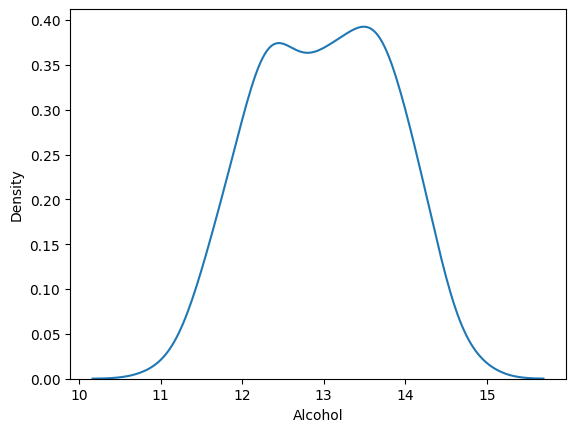

In [69]:
sns.kdeplot(df["Alcohol"]) # type: ignore

<Axes: xlabel='MalicAcid', ylabel='Density'>

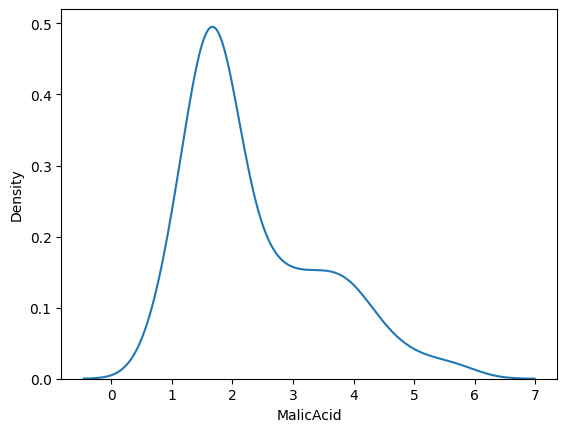

In [70]:
sns.kdeplot(df["MalicAcid"]) # type: ignore

<Axes: xlabel='Alcohol', ylabel='MalicAcid'>

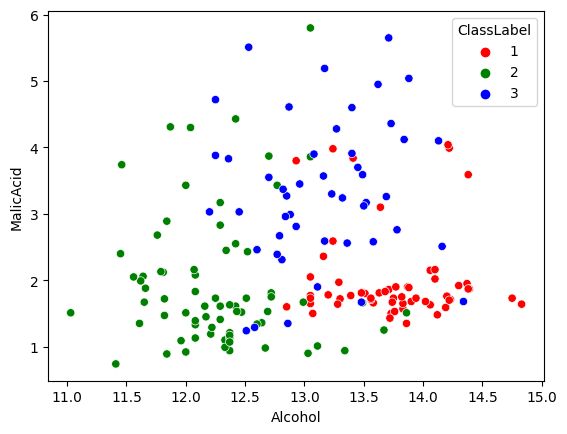

In [71]:
color_dict = {
    1: "red",
    2: "green",
    3: "blue"
}
sns.scatterplot(x = df["Alcohol"], y = df["MalicAcid"], hue=df["ClassLabel"], palette=color_dict)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('ClassLabel', axis = 1),
                                                    df["ClassLabel"],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((124, 2), (54, 2))

In [73]:
# scaler = MinMaxScaler()
# scaler = MaxAbsScaler()
scaler = RobustScaler()

In [74]:


scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_train.columns)

In [76]:
np.round(X_train.describe(), 1)

,Alcohol,MalicAcid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [77]:
np.round(X_train_scaled.describe(), 1)

,Alcohol,MalicAcid
count,124.0,124.0
mean,-0.0,0.3
std,0.6,0.7
min,-1.6,-0.6
25%,-0.5,-0.2
50%,0.0,0.0
75%,0.5,0.8
max,1.3,2.3


In [78]:
# min is 0, max is 1
# mean and standard deviation cannot be guaranteed to be same

<Axes: title={'center': 'After Normalizing'}, xlabel='Alcohol', ylabel='MalicAcid'>

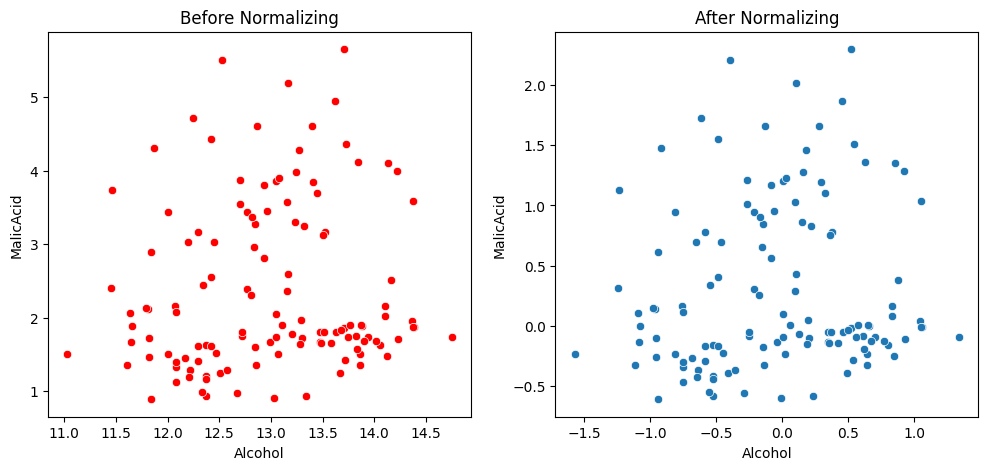

In [79]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.set_title("Before Normalizing")
sns.scatterplot(x = X_train["Alcohol"], y = X_train["MalicAcid"], ax= ax1, color="red")

ax2.set_title("After Normalizing")
sns.scatterplot(x = X_train_scaled["Alcohol"], y = X_train_scaled["MalicAcid"], ax=ax2)

<Axes: title={'center': 'After Normalizing'}, ylabel='Density'>

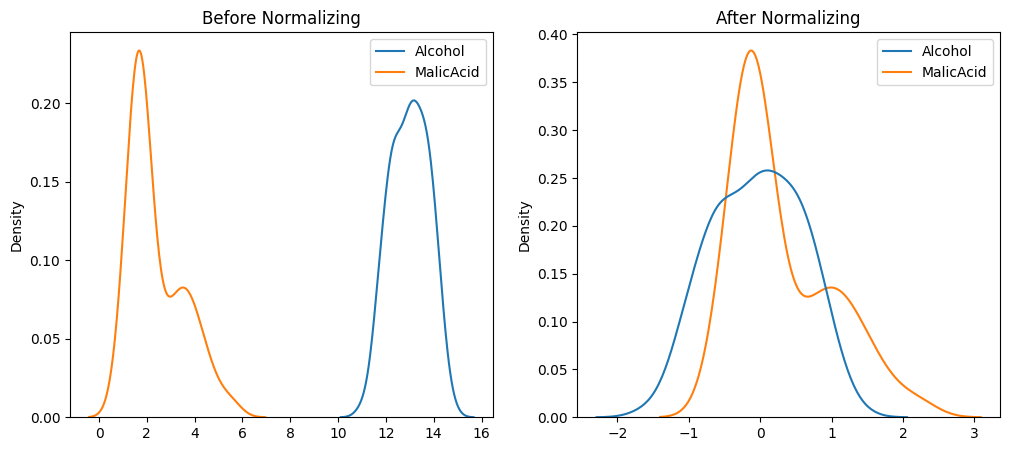

In [80]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.set_title("Before Normalizing")
sns.kdeplot((X_train["Alcohol"], X_train["MalicAcid"]), ax= ax1)

ax2.set_title("After Normalizing")
sns.kdeplot((X_train_scaled["Alcohol"], X_train_scaled["MalicAcid"]), ax=ax2)

<Axes: title={'center': 'After Normalizing'}, xlabel='Alcohol', ylabel='Density'>

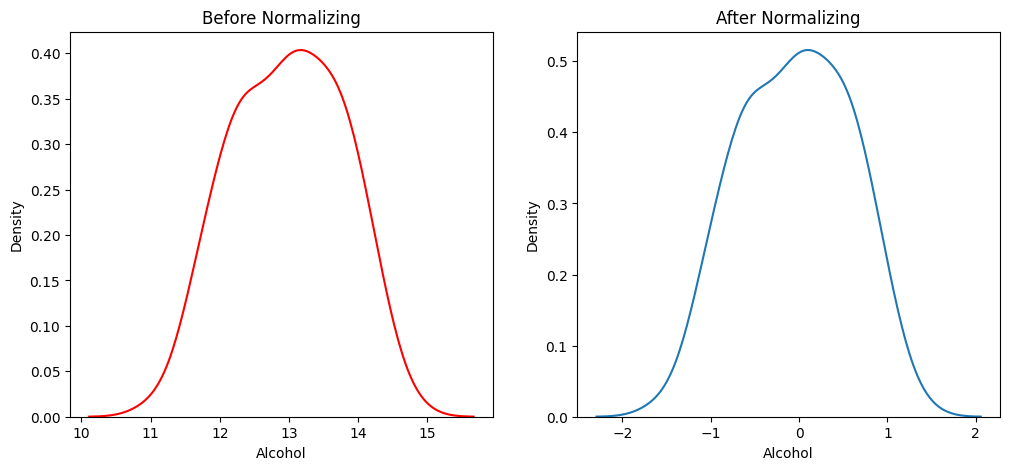

In [81]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.set_title("Before Normalizing")
sns.kdeplot((X_train["Alcohol"]), ax= ax1, color="red")

ax2.set_title("After Normalizing")
sns.kdeplot((X_train_scaled["Alcohol"]), ax=ax2) #type: ignore

<Axes: title={'center': 'After Normalizing'}, xlabel='MalicAcid', ylabel='Density'>

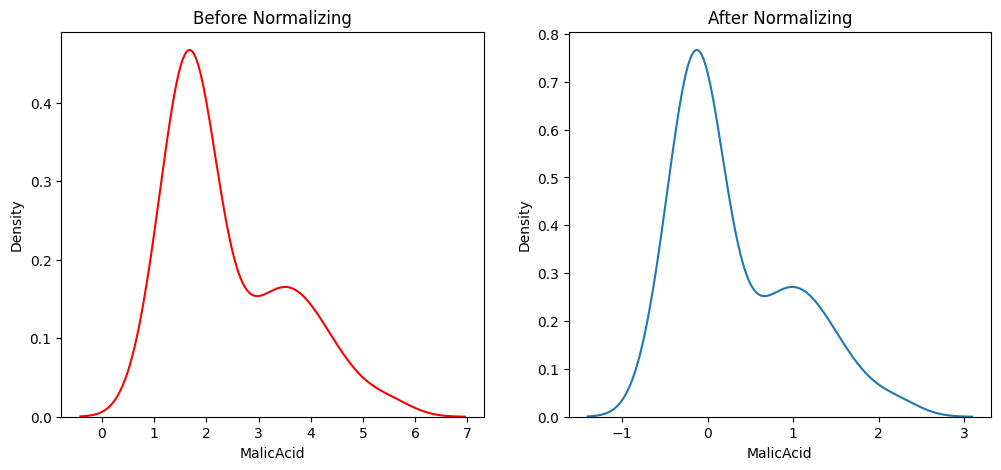

In [82]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.set_title("Before Normalizing")
sns.kdeplot((X_train["MalicAcid"]), ax= ax1, color="red")

ax2.set_title("After Normalizing")
sns.kdeplot((X_train_scaled["MalicAcid"]), ax=ax2) #type: ignore

In [83]:
# the distribution might not be preserved => MinMax Scaling

# Mean Normalization
to be performed....